In [1]:
!pip install -U layoutparser

In [2]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git@v0.4#egg=detectron2'

  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.4) to /tmp/pip-install-enloa_ro/detectron2_b4ac1e9b59ce4387aa80e04a30201297
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-install-enloa_ro/detectron2_b4ac1e9b59ce4387aa80e04a30201297
  Running command git checkout -q 4aca4bdaa9ad48b8e91d7520e0d0815bb8ca0fb1
  Resolved https://github.com/facebookresearch/detectron2.git to commit 4aca4bdaa9ad48b8e91d7520e0d0815bb8ca0fb1
  Preparing metadata (setup.py) ... done


In [3]:
!pip install layoutparser[ocr]

In [4]:
!git clone https://github.com/Layout-Parser/layout-parser.git

fatal: destination path 'layout-parser' already exists and is not an empty directory.


In [5]:
%cd layout-parser/

/content/layout-parser


In [6]:
import cv2
image = cv2.imread("/content/layout-parser/examples/data/example-table.jpeg")
image = image[..., ::-1]

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


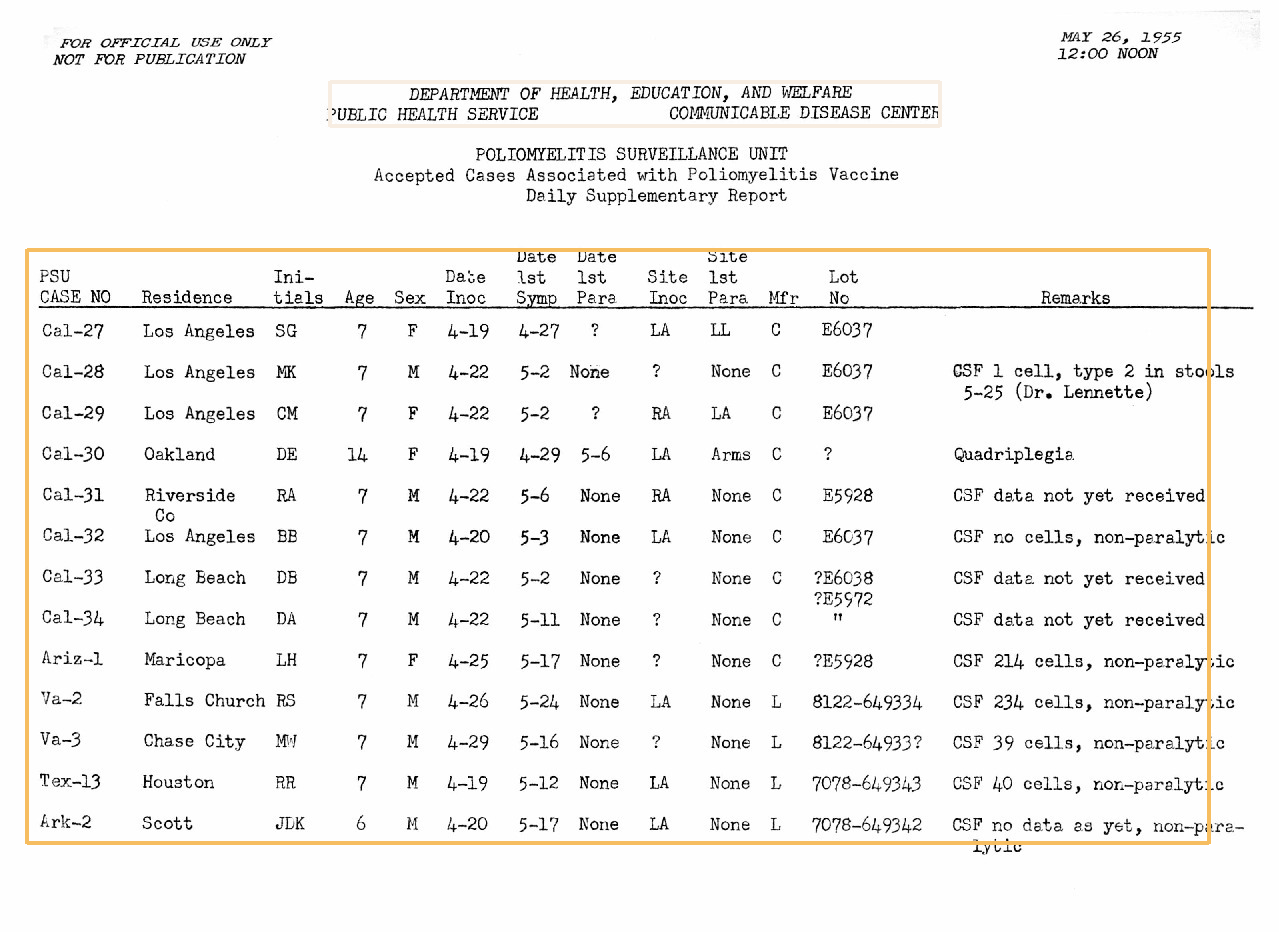

In [7]:
import layoutparser as lp
model = lp.Detectron2LayoutModel('lp://PubLayNet/mask_rcnn_X_101_32x8d_FPN_3x/config',extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.65],
                                 label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})
layout = model.detect(image) # You need to load the image somewhere else, e.g., image = cv2.imread(...)
lp.draw_box(image, layout,)


In [8]:
pip install  google-api-core

In [9]:
!pip install google-cloud-vision

In [10]:
text_blocks = lp.Layout([b for b in layout if b.type=="Table"])
text_blocks

Layout(_blocks=[TextBlock(block=Rectangle(x_1=27.7454833984375, y_1=249.89256286621094, x_2=1208.9000244140625, y_2=843.3307495117188), text=None, id=None, type=Table, parent=None, next=None, score=0.9762900471687317)], page_data={})

In [11]:
figure_blocks = lp.Layout([b for b in layout if b.type=='Figure'])

In [12]:
figure_blocks

Layout(_blocks=[], page_data={})

In [13]:
text_blocks = lp.Layout([b for b in text_blocks \
                   if not any(b.is_in(b_fig) for b_fig in figure_blocks)])


In [14]:
text_blocks

Layout(_blocks=[TextBlock(block=Rectangle(x_1=27.7454833984375, y_1=249.89256286621094, x_2=1208.9000244140625, y_2=843.3307495117188), text=None, id=None, type=Table, parent=None, next=None, score=0.9762900471687317)], page_data={})

In [15]:
h, w = image.shape[:2]

left_interval = lp.Interval(0, w/2*1.05, axis='x').put_on_canvas(image)

left_blocks = text_blocks.filter_by(left_interval, center=True)
left_blocks.sort(key = lambda b:b.coordinates[1])

right_blocks = [b for b in text_blocks if b not in left_blocks]
right_blocks.sort(key = lambda b:b.coordinates[1])

# And finally combine the two list and add the index
# according to the order
text_blocks = lp.Layout([b.set(id = idx) for idx, b in enumerate(left_blocks + right_blocks)])


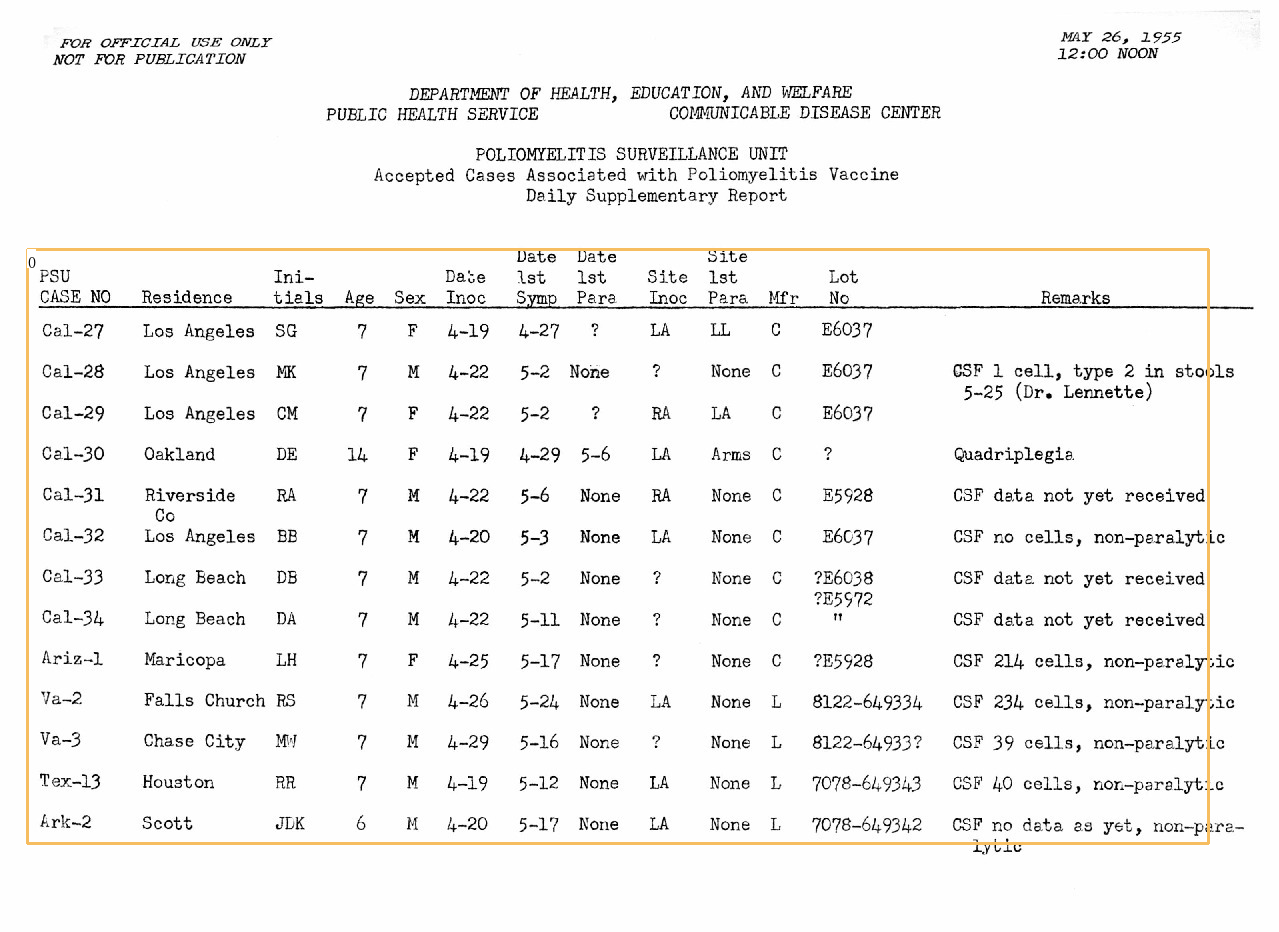

In [16]:
lp.draw_box(image, text_blocks,
            box_width=3,
            show_element_id=True)

In [17]:
ocr_agent = lp.TesseractAgent(languages='eng')
    # Initialize the tesseract ocr engine. You might need
    # to install the OCR components in layoutparser:
    # pip install layoutparser[ocr]


In [18]:
!sudo apt install tesseract-ocr


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 18 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (4,623 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [19]:
for block in text_blocks:
    segment_image = (block
                       .pad(left=5, right=5, top=5, bottom=5)
                       .crop_image(image))
        # add padding in each image segment can help
        # improve robustness

    text = ocr_agent.detect(segment_image)
    block.set(text=text, inplace=True)

In [20]:
for txt in text_blocks.get_texts():
    print(txt, end='\n---\n')


 

Date Date Site
PSU Ini- Date Ast lst ist Lot
CASE NO Residence tials Age Sex Inoc Symp Para Para No Renarks
Cal-27 Los Angeles SG F419 4-27? LL £6037
Cal-28 Los Angeles MK M 4-22 5-2 None None 86037 GSF 1 cell, type 2 in stoc

5-25 (Dr. Lennette)

Cal-29 Los Angeles OM Fo 4-22 5-2 2? LA £6037
Cal-30 Oakland DE Fo o&e19 4-29 5-6 Arms 2 @uadriplegia
Cal-31 Riverside = RA 7 M 4-22 5-6 None None E5928 CSF data not yet received
Cal-32 ie Angeles BB 7 M 4-20 5-3. None None E6037 CSF no cells, non-peralyt;
Gel-33 Long Beach DB 7 M 4-22 5-2 None None 786038 CSF date not yet received
Cal-34 Long Beach DA 7 M 4-22 5-11 None None ei CSF data not yet received
Ariz-l Maricopa LH 7 F 4-25 5-17 None None 785928 CSF 214 cells, non-perelyt
Va-2 Falls Church RS 7 M 4-26 5-24 None None 8122-649334 CSF 23h cells, non~paralyt
Va-3 Chase City MY 7 Mo 4-29 5-16 None None 8122-64933? CSF 39 cells, non-paralyti
Tex-13 Houston RR 7 M 4-19 5-12 None None 7078-64.9343 CSF 40 cells, nor—parelyti
Ark~2 Scott DK 

In [21]:
text_blocks.get_texts()

[' \n\nDate Date Site\nPSU Ini- Date Ast lst ist Lot\nCASE NO Residence tials Age Sex Inoc Symp Para Para No Renarks\nCal-27 Los Angeles SG F419 4-27? LL £6037\nCal-28 Los Angeles MK M 4-22 5-2 None None 86037 GSF 1 cell, type 2 in stoc\n\n5-25 (Dr. Lennette)\n\nCal-29 Los Angeles OM Fo 4-22 5-2 2? LA £6037\nCal-30 Oakland DE Fo o&e19 4-29 5-6 Arms 2 @uadriplegia\nCal-31 Riverside = RA 7 M 4-22 5-6 None None E5928 CSF data not yet received\nCal-32 ie Angeles BB 7 M 4-20 5-3. None None E6037 CSF no cells, non-peralyt;\nGel-33 Long Beach DB 7 M 4-22 5-2 None None 786038 CSF date not yet received\nCal-34 Long Beach DA 7 M 4-22 5-11 None None ei CSF data not yet received\nAriz-l Maricopa LH 7 F 4-25 5-17 None None 785928 CSF 214 cells, non-perelyt\nVa-2 Falls Church RS 7 M 4-26 5-24 None None 8122-649334 CSF 23h cells, non~paralyt\nVa-3 Chase City MY 7 Mo 4-29 5-16 None None 8122-64933? CSF 39 cells, non-paralyti\nTex-13 Houston RR 7 M 4-19 5-12 None None 7078-64.9343 CSF 40 cells, nor—par

In [22]:
for block in text_blocks:
  print(block)

TextBlock(block=Rectangle(x_1=27.7454833984375, y_1=249.89256286621094, x_2=1208.9000244140625, y_2=843.3307495117188), text= 

Date Date Site
PSU Ini- Date Ast lst ist Lot
CASE NO Residence tials Age Sex Inoc Symp Para Para No Renarks
Cal-27 Los Angeles SG F419 4-27? LL £6037
Cal-28 Los Angeles MK M 4-22 5-2 None None 86037 GSF 1 cell, type 2 in stoc

5-25 (Dr. Lennette)

Cal-29 Los Angeles OM Fo 4-22 5-2 2? LA £6037
Cal-30 Oakland DE Fo o&e19 4-29 5-6 Arms 2 @uadriplegia
Cal-31 Riverside = RA 7 M 4-22 5-6 None None E5928 CSF data not yet received
Cal-32 ie Angeles BB 7 M 4-20 5-3. None None E6037 CSF no cells, non-peralyt;
Gel-33 Long Beach DB 7 M 4-22 5-2 None None 786038 CSF date not yet received
Cal-34 Long Beach DA 7 M 4-22 5-11 None None ei CSF data not yet received
Ariz-l Maricopa LH 7 F 4-25 5-17 None None 785928 CSF 214 cells, non-perelyt
Va-2 Falls Church RS 7 M 4-26 5-24 None None 8122-649334 CSF 23h cells, non~paralyt
Va-3 Chase City MY 7 Mo 4-29 5-16 None None 8122-64933?